In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots # Подключаем нужные библиотеки

In [8]:
sample = np.sort(np.random.exponential(scale = 1, size = 25)) # Генерация выборки

In [10]:
def count_mode(sample): # Функция подсчёта моды выборки
    count = {} 
    for i in sample:
        if i not in count:
            count[i] = 0
        count[i]+=1
    max_count = np.max(list(count.values()))
    mode = []
    for i in count:
        if count[i] == max_count:
            mode.append(i)
    return mode

In [12]:
def central_moment(sample, k): # Функция подсчёта центрального момента
    moment = np.sum(sample**k)/len(sample)
    return np.sum((sample - moment)**k)/len(sample)

In [14]:
def asimmetry_coefficient(sample): #Функция подсчёта коэффициента асимметрии
    return central_moment(sample, 3)/(central_moment(sample, 2) ** (3/2))

In [16]:
print("Мода: ", count_mode(sample))
print("Медиана: ", np.median(sample))
print("Размах: ", np.max(sample) - np.min(sample))
print("Коэффициент ассиметрии: ", asimmetry_coefficient(sample))

Мода:  [0.03480641603823561, 0.05164995428626661, 0.1478634820944365, 0.15017092366347115, 0.15928288417140055, 0.1863638143541607, 0.23086389330519236, 0.2412802061199729, 0.37110846656136903, 0.3830381199891848, 0.4171420369821305, 0.4357318063628787, 0.46322868253761623, 0.5032963880913093, 0.5579667766324438, 0.7625522263539058, 0.996490026906559, 1.1979519788483117, 1.260708629524675, 1.5889702723019712, 1.5958120849459707, 1.905299993964167, 2.3743044583104154, 3.138311348536316, 3.145372536950306]
Медиана:  0.46322868253761623
Размах:  3.1105661209120705
Коэффициент ассиметрии:  -20.81891026084065


###### fig = go.Figure() # Эмпирическая функция распределения
fig.add_trace(go.Scatter(x=sample, y=np.arange(1, 26)/len(sample), name = "Оценка"))
fig.add_trace(go.Scatter(x=sample, y= 1 - np.exp(-sample), name = "Настоящая функция"))

In [20]:
x, y = np.histogram(sample)

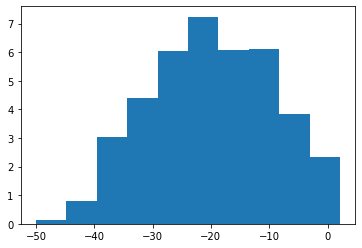

In [25]:
plt.hist(y[:-1], y, weights=x/len(sample)) # Гистограмма
plt.show()

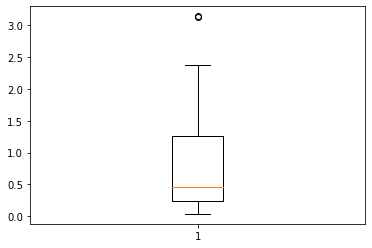

In [26]:
plt.boxplot(sample) # Boxplot
plt.show()

In [27]:
def bootstrap(sample, function): #реализация метода bootstrap
    function_samples = []
    for i in range(1000):
        new_sample = np.random.choice(sample, len(sample))
        function_samples.append(function(new_sample))
    return np.sort(function_samples)

In [28]:
x, y = np.histogram(bootstrap(sample, np.mean))

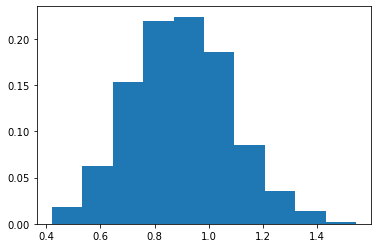

In [29]:
plt.hist(y[:-1], y, weights=x/1000) #бутстреповская оценка плотности распределения среднего арифметического выборки
plt.show()

In [30]:
x, y = np.histogram(bootstrap(sample, asimmetry_coefficient))

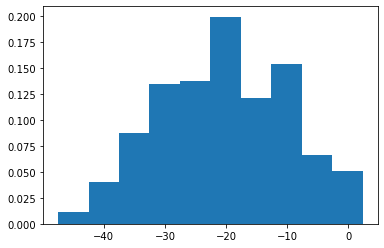

In [31]:
plt.hist(y[:-1], y, weights=x/1000) #бутстреповская оценка плотности распределения коэффициента асимметрии
plt.show()